[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu256s/snippets-nouns/blob/main/gen_nouns_sushi.ipynb)

# setup

## import

In [1]:
!git clone https://github.com/nounsDAO/nouns-monorepo.git

fatal: destination path 'nouns-monorepo' already exists and is not an empty directory.


In [2]:
!git clone https://github.com/Cryptocoders-wtf/sushi-nouns-dao-assets.git

fatal: destination path 'sushi-nouns-dao-assets' already exists and is not an empty directory.


In [3]:
%ls

nouns-monorepo/  sample_data/  sushi-nouns-dao-assets/


In [4]:
import math
import random
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [5]:
seed = None
random.seed(seed)

## func

In [6]:
def im_stack(parts: list) -> Image.Image:
    for i, x in enumerate(parts):
        if i == 0:
            im = Image.open(x)
        else:
            _x = Image.open(x)
            im.paste(_x, mask=_x)
    return im

In [7]:
def plt_ims_auto(ims: list, ncols: int = 5):
    nrows = math.ceil(len(ims) / ncols)
    figsize = (ncols * 2, nrows * 2)
    plt_ims(ims, nrows=nrows, ncols=ncols, figsize=figsize)


def plt_ims(ims: list,
            nrows=4, ncols=5, figsize=(10, 8)):
  fig, axs = plt.subplots(nrows, ncols, figsize=figsize,
                          subplot_kw={'xticks': [], 'yticks': []})

  for ax in axs.flat:
    ax.axis('off')

  for ax, im in zip(axs.flat, ims):
      ax.imshow(im)

  fig.tight_layout()
  plt.show()

In [8]:
def table_traits(p_traits):
    df = pd.DataFrame([[y.stem for y in x] for x in p_traits],
            columns=['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses'] )
    display(df.replace("^.*?-", "", regex=True))

## traits

In [9]:
# nouns-assets
p0 = Path(r'./nouns-monorepo/packages/nouns-assets/images')

dir_traits0 = sorted([x for x in p0.iterdir() if x.is_dir()])
traits0 = [list(x.glob("*.png")) for x in dir_traits0]

print([x.name for x in dir_traits0])
print([len(x) for x in traits0])

['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses']
[2, 30, 137, 234, 21]


In [10]:
# sushi-nouns-dao-assets
p1 = Path(r'./sushi-nouns-dao-assets/images')

dir_traits1 = sorted([x for x in p1.iterdir() if x.is_dir()])
traits1 = [list(x.glob("*.png")) for x in dir_traits1]

print([x.name for x in dir_traits1[:5]])
print([len(x) for x in traits1])

['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses']
[13, 0, 7, 19, 0, 1]


In [11]:
# use these
traits = traits0.copy()
traits[0] = traits1[0]
traits[2] = traits1[2]
traits[3] = traits1[3]

print([len(x) for x in traits])

[13, 30, 7, 19, 21]


# generate

## 1 noun

['bg-koushi', 'body-foggrey', 'accessory-Dpad', 'head-tamago-v3', 'glasses-square-red']


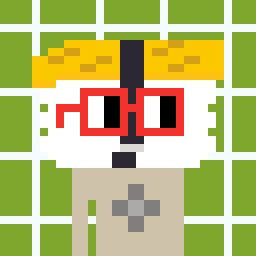

In [12]:
# # specify:
# parts = [dir_traits1[0] / 'bg-warm.png',
#          dir_traits1[1] / 'body-grayscale-1.png',
#          dir_traits1[2] / 'accessory-1n.png',
#          dir_traits1[3] / 'head-film-35mm.png',
#          dir_traits1[4] / 'glasses-square-red.png'
#          ]

# random:
parts = [random.choice(x) for x in traits]
noun = im_stack(parts)

print([x.stem for x in parts])
# noun
# noun.save("out.png")
noun.resize((256, 256), Image.NEAREST)

## n nouns

In [13]:
n = 20

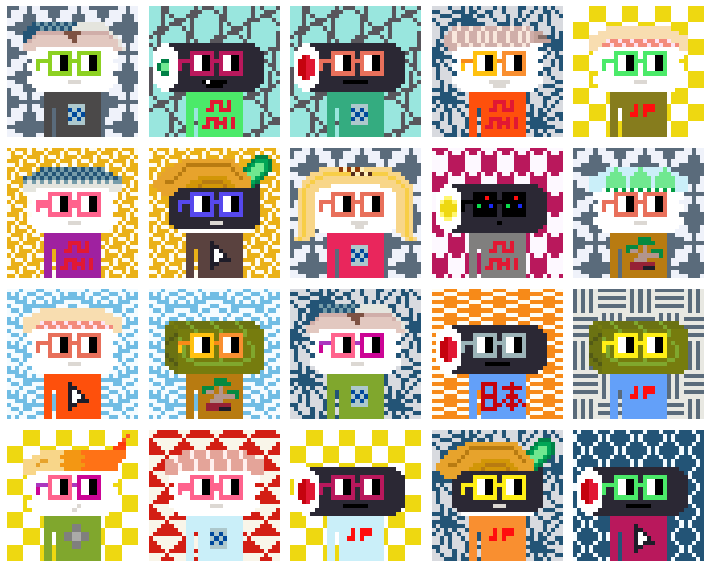

In [14]:
p_traits = [[random.choice(x) for x in traits]
            for i in range(n)]
ims = [im_stack(x) for x in p_traits]

plt_ims_auto(ims)

In [15]:
table_traits(p_traits)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,shippou,grayscale-7,yunomi,shime-mackerel,square-frog-green
1,kagome,teal-light,txt-sushi,kappa-maki,square-magenta
2,kagome,teal,yunomi,tekka-maki,square-watermelon
3,asanoha,orange,txt-sushi,shako,square-yellow-orange-multi
4,ichimatsu,gunk,txt-jp,sea-​​bream,square-teal
5,fundou,magenta,txt-sushi,kohada,hip-rose
6,fundou,darkbrown,pointer,uni-cucumber,square-blue
7,shippou,redpinkish,yunomi,conger-eel,square-watermelon
8,yagasuri,bluegrey,txt-sushi,takuan-maki,square-black-rgb
9,shippou,gold,bonsai,squid,square-guava


## for each bg

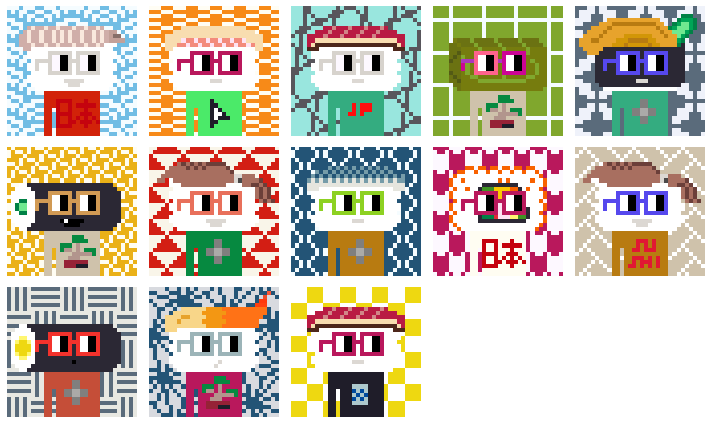

In [16]:
n = len(traits[0])
p_traits_bg = [[
                traits[0][i],
                random.choice(traits[1]),
                random.choice(traits[2]),
                random.choice(traits[3]),
                random.choice(traits[4]),
                ]
                for i in range(n)]
ims_bg = [im_stack(x) for x in p_traits_bg]

plt_ims_auto(ims_bg)

In [17]:
table_traits(p_traits_bg)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,seigaiha,red,nihon-logo,shako,square-smoke
1,hishi,teal-light,pointer,sea-​​bream,square-magenta
2,kagome,teal,txt-jp,skipjack,square-smoke
3,koushi,bege-crt,bonsai,kakinoha,square-pink-purple-multi
4,shippou,teal,Dpad,uni-cucumber,square-blue
5,fundou,foggrey,bonsai,kappa-maki,square-honey
6,uroko,green,Dpad,firefly-squid,square-guava
7,tatewaku,gold,Dpad,kohada,square-frog-green
8,yagasuri,grayscale-1,nihon-logo,california-roll,square-magenta
9,higaki,gold,txt-sushi,firefly-squid,square-blue


## for each head

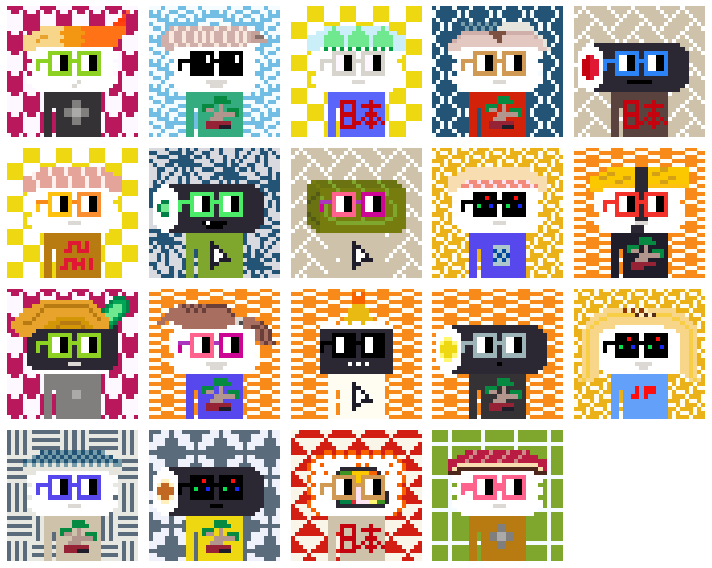

In [18]:
n = len(traits[3])
p_traits_head = [[
                random.choice(traits[0]),
                random.choice(traits[1]),
                random.choice(traits[2]),
                traits[3][i],
                random.choice(traits[4]),
                 ]
            for i in range(n)]
ims_head = [im_stack(x) for x in p_traits_head]

plt_ims_auto(ims_head)

In [19]:
table_traits(p_traits_head)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,yagasuri,grayscale-8,Dpad,aoyagi,square-frog-green
1,seigaiha,teal,bonsai,shako,square-fullblack
2,ichimatsu,purple,nihon-logo,squid,square-smoke
3,tatewaku,red,bonsai,shime-mackerel,square-honey
4,higaki,darkbrown,nihon-logo,tekka-maki,square-blue-med-saturated
5,ichimatsu,gold,txt-sushi,medium-fatty-tuna,square-yellow-orange-multi
6,asanoha,slimegreen,pointer,kappa-maki,square-teal
7,higaki,foggrey,pointer,kakinoha,square-pink-purple-multi
8,fundou,computerblue,yunomi,sea-​​bream,square-black-rgb
9,hishi,grayscale-9,bonsai,tamago-v3,square-red
